In [1]:
import pandas as pd
import numpy as np
import pickle

from tqdm import tqdm

from models import Model1, Model2, Model3
from tools import Train, validation, GridSearch

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')

from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
with open('data/train_dataset.pickle', 'rb') as f:
    train_dataset = pickle.load(f)

with open('data/val_dataset.pickle', 'rb') as f:
    val_dataset = pickle.load(f)

with open('data/test_dataset.pickle', 'rb') as f:
    test_dataset = pickle.load(f)

In [4]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [5]:
criterion = nn.MSELoss()
eval_metrics = [
    r2_score,
    mean_absolute_error
]

# Model 3

In [6]:
basic_params = {
    'T': 60,
    'n': 40
}

param_grid = {
    'm': [32, 40],
    'skip_hidden_size': [32, 40],
    'T_modified': [20, 30],
    'skip': [8, 10]
}

model_name = 'model3'
grid_model3 = GridSearch(criterion, eval_metrics, device, temp_save_path=f'checkpoints/model_by_param/temp_{model_name}.pt', masked=False)
best_model3 = grid_model3.train_by_grid(
        Model3, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename=f'checkpoints/{model_name}_best.pt'
    )

Total  16 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [01:20<00:00, 32.44it/s, Train Loss=0.7812, Valid Loss=0.1736, Valid R2=0.6084, Valid MAE=0.3283]


Early Stopped
Setting   1 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [01:20<00:00, 32.21it/s, Train Loss=0.7189, Valid Loss=0.2197, Valid R2=0.5042, Valid MAE=0.4060]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch 15: 100%|██████████| 2607/2607 [01:39<00:00, 26.33it/s, Train Loss=0.7123, Valid Loss=0.1733, Valid R2=0.6089, Valid MAE=0.3394]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [01:38<00:00, 26.60it/s, Train Loss=0.7190, Valid Loss=0.2193, Valid R2=0.5051, Valid MAE=0.3918]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:18<00:00, 33.06it/s, Train Loss=0.7523, Valid Loss=0.2352, Valid R2=0.4693, Valid MAE=0.4026]


Early Stopped
Setting   5 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:19<00:00, 32.72it/s, Train Loss=0.7723, Valid Loss=0.2534, Valid R2=0.4283, Valid MAE=0.4326]


Early Stopped
Setting   6 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [01:38<00:00, 26.51it/s, Train Loss=0.7240, Valid Loss=0.1607, Valid R2=0.6374, Valid MAE=0.3193]


Early Stopped
Setting   7 of Parameters Grid is now on progres.


Epoch 15: 100%|██████████| 2607/2607 [01:39<00:00, 26.08it/s, Train Loss=0.7099, Valid Loss=0.2529, Valid R2=0.4294, Valid MAE=0.4380]


Early Stopped
Setting   8 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [01:19<00:00, 32.93it/s, Train Loss=0.7622, Valid Loss=0.2908, Valid R2=0.3439, Valid MAE=0.4433]


Early Stopped
Setting   9 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [01:16<00:00, 34.06it/s, Train Loss=0.7414, Valid Loss=0.2026, Valid R2=0.5430, Valid MAE=0.3699]


Early Stopped
Setting  10 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [01:38<00:00, 26.34it/s, Train Loss=0.7368, Valid Loss=0.1488, Valid R2=0.6642, Valid MAE=0.2990]


Early Stopped
Setting  11 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [01:39<00:00, 26.19it/s, Train Loss=0.7314, Valid Loss=0.2170, Valid R2=0.5104, Valid MAE=0.3980]


Early Stopped
Setting  12 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [01:17<00:00, 33.62it/s, Train Loss=0.7448, Valid Loss=0.1598, Valid R2=0.6395, Valid MAE=0.3263]


Early Stopped
Setting  13 of Parameters Grid is now on progres.


Epoch 15: 100%|██████████| 2607/2607 [01:20<00:00, 32.39it/s, Train Loss=0.7109, Valid Loss=0.2467, Valid R2=0.4434, Valid MAE=0.4150]


Early Stopped
Setting  14 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [01:38<00:00, 26.42it/s, Train Loss=0.7218, Valid Loss=0.1585, Valid R2=0.6423, Valid MAE=0.3253]


Early Stopped
Setting  15 of Parameters Grid is now on progres.


Epoch 17: 100%|██████████| 2607/2607 [01:39<00:00, 26.19it/s, Train Loss=0.6773, Valid Loss=0.2134, Valid R2=0.5185, Valid MAE=0.3828]

Early Stopped


Test Loss: 0.2120 | Test R2: 0.8848 | Test MAE: 0.3786
Saving Process Complete. Directory: model3_losses.png


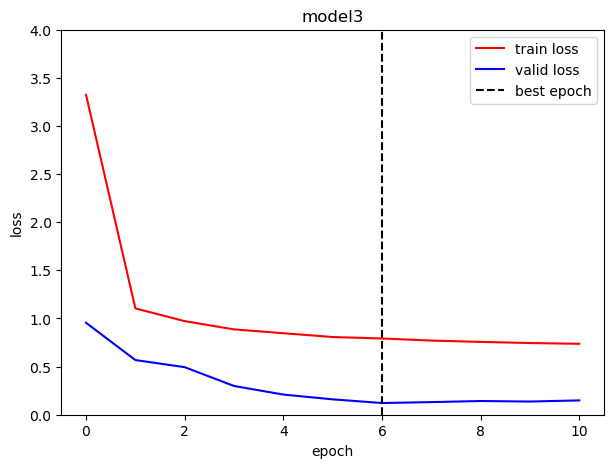

In [7]:
grid_model3.test(test_loader)
grid_model3.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')